In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import load_dataset
import my_models

In [12]:
model = my_models.ResNet50()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 180, 180, 3)  0           ['input_4[0][0]']                
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 186, 186, 3)  0          ['rescaling_3[0][0]']            
 D)                                                                                               
                                                                                            

In [6]:
train_ds,valid_ds= load_dataset.load_dataset(batch_size=5)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


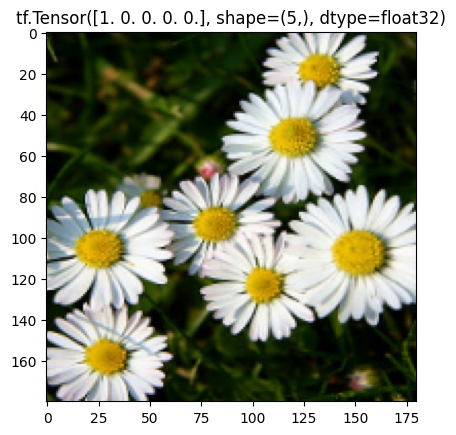

In [7]:
for image,label in train_ds.take(1):
    print(train_ds.class_names)
    plt.imshow(image[1].numpy().astype('uint8'))
    plt.title(str(label[1]))
    plt.show()
    break

In [8]:
model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
for images,labels in valid_ds.take(1):
    print(images.shape)
    print(labels.shape)
    break

(5, 180, 180, 3)
(5, 5)


In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
epochs = 10
history = model.fit(train_ds,validation_data=valid_ds,epochs=epochs)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()